In [2]:
from ultralytics import YOLO
import cv2
from matplotlib import pyplot as plt


In [2]:
model = YOLO('helmet_detection_model.pt')


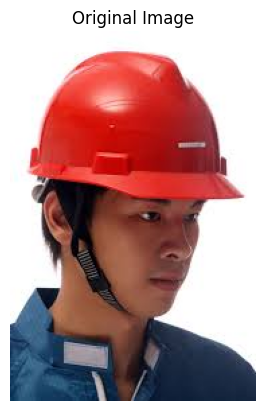

In [3]:
%matplotlib inline
from ultralytics import YOLO
import cv2
from matplotlib import pyplot as plt

model = YOLO('helmet_detection_model.pt')

image_path = 'test_image.jpeg'
img = cv2.imread(image_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.axis('off')
plt.title('Original Image')
plt.show()



0: 640x448 1 helmet, 153.3ms
Speed: 7.2ms preprocess, 153.3ms inference, 321.2ms postprocess per image at shape (1, 3, 640, 448)


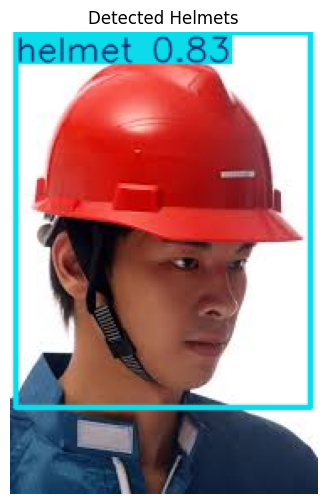

In [4]:
%matplotlib inline
from ultralytics import YOLO
import cv2
from matplotlib import pyplot as plt

# Load the model
model = YOLO('helmet_detection_model.pt')

# Read the image
image_path = 'test_image.jpeg'
img = cv2.imread(image_path)

# Run detection
results = model(img)

# Get annotated image (with bounding boxes)
annotated_frame = results[0].plot()

# Convert BGR (OpenCV) to RGB (for matplotlib)
annotated_rgb = cv2.cvtColor(annotated_frame, cv2.COLOR_BGR2RGB)

# Show result
plt.figure(figsize=(10, 6))
plt.imshow(annotated_rgb)
plt.axis('off')
plt.title("Detected Helmets")
plt.show()


Real-time Helmet Detection with OpenCV 

In [1]:
from ultralytics import YOLO
import cv2

# Load the trained YOLO model
model = YOLO("helmet_detection_model.pt")

# Open webcam (0 = default camera)
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Error: Could not open webcam.")
    exit()

while True:
    # Read a frame from the webcam
    ret, frame = cap.read()
    if not ret:
        break

    # Run YOLO detection
    results = model(frame)

    # Plot the results on the frame
    annotated_frame = results[0].plot()

    # Show the annotated frame
    cv2.imshow("Helmet Detection (Press 'q' to quit)", annotated_frame)

    # Press 'q' to quit
    if cv2.waitKey(1) & 0xFF == ord("q"):
        break

# Release the webcam and close windows
cap.release()
cv2.destroyAllWindows()



0: 480x640 (no detections), 176.3ms
Speed: 11.5ms preprocess, 176.3ms inference, 106.7ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 27.6ms
Speed: 5.5ms preprocess, 27.6ms inference, 2.7ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 helmet, 25.3ms
Speed: 8.6ms preprocess, 25.3ms inference, 220.7ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 helmet, 58.7ms
Speed: 7.8ms preprocess, 58.7ms inference, 6.1ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 helmet, 46.1ms
Speed: 5.0ms preprocess, 46.1ms inference, 9.1ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 helmet, 27.0ms
Speed: 4.1ms preprocess, 27.0ms inference, 5.5ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 helmet, 31.7ms
Speed: 4.6ms preprocess, 31.7ms inference, 4.1ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 26.2ms
Speed: 4.3ms preprocess, 26.2ms inference, 2.1ms postprocess 

In [1]:
import tkinter as tk
from tkinter import messagebox
from PIL import Image, ImageTk
import cv2
from ultralytics import YOLO
import threading
import numpy as np
import pygame
import platform

class HelmetDetectionApp:
    def __init__(self, root):
        self.root = root
        self.root.title("SanjhSuraksha: Helmet Detection System")
        self.root.geometry("900x700")
        self.root.configure(bg="#1e3a8a")  # Dark blue background

        # Initialize YOLO model
        self.model = YOLO("helmet_detection_model.pt")
        # Print class names for debugging
        print("Model class names:", self.model.names)
        
        # Initialize webcam
        self.cap = cv2.VideoCapture(0)
        if not self.cap.isOpened():
            messagebox.showerror("Error", "Could not open webcam.")
            self.root.quit()
            return

        # Initialize pygame for sound
        pygame.mixer.init()
        self.siren_sound = self.create_siren_sound()

        # Detection running flag
        self.running = False

        # Create GUI elements
        self.create_gui()

        # Bind window close event
        self.root.protocol("WM_DELETE_WINDOW", self.on_closing)

    def create_siren_sound(self):
        # Generate a two-tone siren sound (alternating frequencies)
        sample_rate = 44100
        duration = 1.0  # seconds
        t = np.linspace(0, duration, int(sample_rate * duration), False)
        
        # Create two tones: 800 Hz and 1000 Hz for alternating siren effect
        tone1 = np.sin(2 * np.pi * 800 * t)  # Lower pitch
        tone2 = np.sin(2 * np.pi * 1000 * t)  # Higher pitch
        
        # Alternate tones every 0.5 seconds
        half_samples = int(sample_rate * duration / 2)
        siren = np.concatenate((tone1[:half_samples], tone2[half_samples:]))
        
        # Apply amplitude envelope to avoid clicks
        envelope = np.exp(-4 * t / duration)  # Exponential decay for smoothness
        siren = siren * envelope
        
        # Normalize to 16-bit range
        siren = (siren * 32767).astype(np.int16)
        
        # Convert to stereo (2D array)
        siren_stereo = np.column_stack((siren, siren))
        return pygame.sndarray.make_sound(siren_stereo)

    def create_gui(self):
        # Header frame
        header_frame = tk.Frame(self.root, bg="#facc15")  # Bright yellow header
        header_frame.pack(fill=tk.X)
        tk.Label(
            header_frame,
            text="SanjhSuraksha",
            font=("Arial", 24, "bold"),
            bg="#facc15",
            fg="#000000",  # Black font
            pady=10
        ).pack()
        tk.Label(
            header_frame,
            text="Powered by HelmAI — Safety First, Always.",
            font=("Arial", 14, "bold"),
            bg="#facc15",
            fg="#000000",  # Black font
            pady=5
        ).pack()

        # Main content frame
        main_frame = tk.Frame(self.root, bg="#1e3a8a")  # Dark blue background
        main_frame.pack(pady=20, padx=20, fill=tk.BOTH, expand=True)

        # Video feed label
        self.video_label = tk.Label(main_frame, bg="#ffffff", bd=3, relief=tk.SOLID, highlightbackground="#facc15")  # Yellow border
        self.video_label.pack(pady=10)

        # Status and detection frame
        status_frame = tk.Frame(main_frame, bg="#1e3a8a")
        status_frame.pack(pady=10)

        # Status label
        self.status_label = tk.Label(
            status_frame,
            text="Status: Stopped",
            font=("Helvetica", 14, "bold"),
            bg="#1e3a8a",
            fg="#facc15"  # Bright yellow font
        )
        self.status_label.pack(side=tk.LEFT, padx=10)

        # Detection status label
        self.detection_label = tk.Label(
            status_frame,
            text="Detection: None",
            font=("Helvetica", 14, "bold"),
            bg="#1e3a8a",
            fg="#facc15"  # Bright yellow font
        )
        self.detection_label.pack(side=tk.LEFT, padx=10)

        # Red light indicator (larger with yellow border)
        self.light_canvas = tk.Canvas(main_frame, width=80, height=80, bg="#1e3a8a", highlightthickness=0)
        self.light_canvas.create_oval(10, 10, 70, 70, outline="#facc15", width=3, fill="grey")  # Yellow border
        self.light = self.light_canvas.create_oval(15, 15, 65, 65, fill="grey")
        self.light_canvas.pack(pady=15)

        # Button frame
        button_frame = tk.Frame(main_frame, bg="#1e3a8a")
        button_frame.pack(pady=10)

        # Button style function for hover effects
        def on_enter(button, bg):
            button.config(bg=bg)

        def on_leave(button, bg):
            button.config(bg=bg)

        # Start button
        self.start_button = tk.Button(
            button_frame,
            text="Start Detection",
            command=self.start_detection,
            font=("Helvetica", 12, "bold"),
            bg="#22c55e",  # Vivid green
            fg="#ffffff",
            width=15,
            relief=tk.FLAT,
            activebackground="#16a34a"  # Brighter hover green
        )
        self.start_button.pack(side=tk.LEFT, padx=10)
        self.start_button.bind("<Enter>", lambda e: on_enter(self.start_button, "#16a34a"))
        self.start_button.bind("<Leave>", lambda e: on_leave(self.start_button, "#22c55e"))

        # Stop button
        self.stop_button = tk.Button(
            button_frame,
            text="Stop Detection",
            command=self.stop_detection,
            font=("Helvetica", 12, "bold"),
            bg="#ef4444",  # Vivid red
            fg="#ffffff",
            width=15,
            relief=tk.FLAT,
            activebackground="#dc2626"  # Brighter hover red
        )
        self.stop_button.pack(side=tk.LEFT, padx=10)
        self.stop_button.config(state="disabled")
        self.stop_button.bind("<Enter>", lambda e: on_enter(self.stop_button, "#dc2626"))
        self.stop_button.bind("<Leave>", lambda e: on_leave(self.stop_button, "#ef4444"))

    def start_detection(self):
        if not self.running:
            self.running = True
            self.start_button.config(state="disabled")
            self.stop_button.config(state="normal")
            self.status_label.config(text="Status: Running")
            threading.Thread(target=self.update_frame, daemon=True).start()

    def stop_detection(self):
        self.running = False
        self.start_button.config(state="normal")
        self.stop_button.config(state="disabled")
        self.status_label.config(text="Status: Stopped")
        self.detection_label.config(text="Detection: None")
        self.light_canvas.itemconfig(self.light, fill="grey")
        pygame.mixer.stop()

    def update_frame(self):
        while self.running:
            ret, frame = self.cap.read()
            if not ret:
                messagebox.showerror("Error", "Failed to capture video frame.")
                self.stop_detection()
                break

            # Run YOLO detection
            results = self.model(frame)
            annotated_frame = results[0].plot()

            # Get detected classes
            detected_classes = [int(cls) for cls in results[0].boxes.cls] if results[0].boxes else []

            # Determine if no helmet is detected (assuming class 0 = no_helmet)
            no_helmet_detected = 0 in detected_classes

            if no_helmet_detected:
                self.detection_label.config(text="Detection: No Helmet", fg="#ef4444")  # Red for no helmet
                self.light_canvas.itemconfig(self.light, fill="red")
                if not pygame.mixer.get_busy():
                    self.siren_sound.play(-1)  # Play siren in loop
            else:
                self.detection_label.config(text="Detection: Helmet Detected", fg="#22c55e")  # Green for helmet
                self.light_canvas.itemconfig(self.light, fill="green")
                pygame.mixer.stop()

            # Convert frame to ImageTk format
            frame_rgb = cv2.cvtColor(annotated_frame, cv2.COLOR_BGR2RGB)
            img = Image.fromarray(frame_rgb)
            # Resize to fit window while maintaining aspect ratio
            img = img.resize((720, 540), Image.Resampling.LANCZOS)
            imgtk = ImageTk.PhotoImage(image=img)

            # Update video label
            self.video_label.configure(image=imgtk)
            self.video_label.image = imgtk  # Keep a reference to avoid garbage collection

            # Small delay to prevent GUI freezing
            self.root.update()

        # Clear video feed and reset indicators when stopped
        self.video_label.configure(image="")
        self.video_label.image = None
        self.detection_label.config(text="Detection: None")
        self.light_canvas.itemconfig(self.light, fill="grey")
        pygame.mixer.stop()

    def on_closing(self):
        if messagebox.askokcancel("Quit", "Do you want to quit?"):
            self.running = False
            self.cap.release()
            pygame.mixer.quit()
            self.root.destroy()

if __name__ == "__main__":
    if platform.system() == "Emscripten":
        import asyncio
        async def main():
            root = tk.Tk()
            app = HelmetDetectionApp(root)
            await asyncio.sleep(0)
        asyncio.ensure_future(main())
    else:
        root = tk.Tk()
        app = HelmetDetectionApp(root)
        root.mainloop()

pygame 2.6.1 (SDL 2.28.4, Python 3.10.16)
Hello from the pygame community. https://www.pygame.org/contribute.html
Model class names: {0: 'head', 1: 'helmet', 2: 'person'}

0: 480x640 1 head, 123.9ms
Speed: 6.0ms preprocess, 123.9ms inference, 183.5ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 head, 28.2ms
Speed: 3.3ms preprocess, 28.2ms inference, 5.8ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 head, 27.5ms
Speed: 3.4ms preprocess, 27.5ms inference, 7.3ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 head, 28.3ms
Speed: 3.7ms preprocess, 28.3ms inference, 5.1ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 head, 24.1ms
Speed: 2.7ms preprocess, 24.1ms inference, 4.8ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 head, 25.8ms
Speed: 1.9ms preprocess, 25.8ms inference, 4.8ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 head, 36.9ms
Speed: 2.7ms preprocess, 36.9ms inference, 5.0ms postp